# Lending Club Case Study

##### Group Members
Facilitator - Siddharth Nagpure <br>
Team Member - Anjani Nimmakayala

### About Company:

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast, online interface.

### Context:
Lending Club wants to understand the driving factors behind loan default, i.e. the driver variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

### Case Study Objective:
- Identification of Loan Applicant traits that tend to ‘default’ paying back
- Understand the ‘Driving Factors’ or ‘Driver Variables’ behind Loan Default phenomena
- Loan Lending Organizations may choose to utilize this knowledge for its portfolio and risk assessment of new loan applicants

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

###### Loading CSV file into Data Frame

In [2]:
loan_data = pd.read_csv("loan.csv", low_memory=False)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
loan_data.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,Stark and Roth Inc,2 years,MORTGAGE,180000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Need a loan to make some home improvments,home_improvement,home improvment loan,530xx,WI,11.93,0,Feb-95,1,0.0,0.0,16,0,60568,39.20%,38,f,0.0,0.0,5751.530533,603.91,5000.0,751.53,0.0,0.0,0.0,Jul-10,161.55,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,Millenium Group,4 years,MORTGAGE,48000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I would like to pay off my high-interest credi...,debt_consolidation,Tito5000,333xx,FL,8.03,0,Aug-95,1,0.0,0.0,6,0,28329,48.60%,6,f,0.0,0.0,5804.732505,435.36,5000.0,804.73,0.0,0.0,0.0,Jul-10,162.07,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,Self-Employeed,< 1 year,OWN,80000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,P's Family Credit Loan,537xx,WI,1.21,0,Jul-96,3,0.0,44.0,15,1,27185,16.10%,29,f,0.0,0.0,5912.052998,798.13,5000.0,912.05,0.0,0.0,0.0,Jul-10,165.17,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,My Credit Card Loan,537xx,WI,0.31,0,Oct-97,0,0.0,0.0,7,0,216,0.60%,19,f,0.0,0.0,5593.626092,279.68,5000.0,593.63,0.0,0.0,0.0,Jul-10,156.29,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
loan_data.shape

(39717, 111)

###### Loan data frame contains 39717 rows and 111 columns

---
# Data Cleaning

---

###### Checking Number of missing values in each column

In [6]:
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


###### Percentage of missing values in each column

In [7]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)
missing.loc[missing!=0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

###### Lets remove columns having more than 75% of null values

In [8]:
loan_data = loan_data.dropna(thresh=loan_data.shape[0]*0.75,how='all',axis=1)

In [9]:
print("Shape after Removing columns having more than 75% of null values:" , loan_data.shape[0], "rows and",loan_data.shape[1],"columns ")

Shape after Removing columns having more than 75% of null values: 39717 rows and 53 columns 


###### Again summarise missing values percentage of each column

In [10]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)
missing.loc[missing!=0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

###### By looking at the data below fields doesn't add any value to our analysis

1. id
2. member_id
3. url
4. zip_code
5. emp_title
6. title

In [11]:
columns_to_drop = ['id','member_id','url','zip_code','emp_title','title']
loan_data.drop(columns_to_drop, axis= 1, inplace=True)

In [12]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


###### Remove columns where number of unique value is one

In [13]:
unique = loan_data.nunique()
unique = unique[unique.values == 1]

In [14]:
unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [15]:
loan_data.drop(list(unique.index),axis=1,inplace=True)

pub_rec_bankruptcies has 1.75% of null values, rather than imputing, we should get rid of rows having null values

In [16]:
loan_data = loan_data[~loan_data['pub_rec_bankruptcies'].isnull()]

In [17]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)
missing.loc[missing!=0]

emp_length      2.75
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

Next, the columns emp_title, revol_util and last_pymnt_d have 2.75%, 0.13% and 0.18% missing value respectively. 
Let's remove the rows with nan/blank values for these varaibles.

In [18]:
loan_data = loan_data[~loan_data['emp_length'].isnull()]
loan_data = loan_data[~loan_data['revol_util'].isnull()]
loan_data = loan_data[~loan_data['last_pymnt_d'].isnull()]

In [19]:
missing = round(100*(loan_data.isnull().sum()/len(loan_data.index)),2)
missing.loc[missing!=0]

Series([], dtype: float64)

In [20]:
print("Shape after dropping columns with single values and rows with null values:" , loan_data.shape[0], "rows and",loan_data.shape[1],"columns")

Shape after dropping columns with single values and rows with null values: 37836 rows and 38 columns


###### Data Type Checking

In [21]:
loan_data.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv     

###### Converting int_rate, revol_util into float, for the sake of future analysis

In [22]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : x.rstrip("%")).astype(float)

In [23]:
loan_data['revol_util'] = loan_data['revol_util'].astype(str).apply(lambda x : x.rstrip("%")).astype(float)

In [24]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


###### Converting term into int

In [25]:
loan_data['term'] = loan_data['term'].apply(lambda x : x.rstrip("months")).astype(int)

In [26]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


###### Convert issue_d, earliest_cr_line, last_payment_d, last_credit_pull_d to datetime

In [27]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line,format='%b-%y')
loan_data.last_pymnt_d = pd.to_datetime(loan_data.last_pymnt_d, format='%b-%y')
loan_data.last_credit_pull_d = pd.to_datetime(loan_data.last_credit_pull_d, format='%b-%y')

In [28]:
loan_data[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37836 entries, 0 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37836 non-null  datetime64[ns]
 1   earliest_cr_line    37836 non-null  datetime64[ns]
 2   last_pymnt_d        37836 non-null  datetime64[ns]
 3   last_credit_pull_d  37835 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


###### Deleting duplicate rows if any

In [29]:
loan_data.drop_duplicates(inplace=True)

In [30]:
print("Shape after dropping duplicates:" , loan_data.shape[0], "rows and",loan_data.shape[1],"columns")

Shape after dropping duplicates: 37836 rows and 38 columns


In [31]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


###### Let's explore unique values in emp_length column

In [32]:
loan_data.emp_length.value_counts()

10+ years    8750
< 1 year     4397
2 years      4293
3 years      4023
4 years      3377
5 years      3236
1 year       3133
6 years      2193
7 years      1747
8 years      1449
9 years      1238
Name: emp_length, dtype: int64

In [33]:
# Let's convert these values from 0-10 for ease of analysis

emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

loan_data = loan_data.replace({"emp_length": emp_length_dict })

In [34]:
loan_data.emp_length.value_counts()

10    8750
0     4397
2     4293
3     4023
4     3377
5     3236
1     3133
6     2193
7     1747
8     1449
9     1238
Name: emp_length, dtype: int64

###### Let's split issue_d to issue_d_month and issue_d_year

In [35]:
loan_data['issue_d_month'] = loan_data['issue_d'].dt.month
loan_data['issue_d_year'] = loan_data['issue_d'].dt.year

In [36]:
loan_data['issue_d_year'].value_counts()

2011    20857
2010    11180
2009     4688
2008     1104
2007        7
Name: issue_d_year, dtype: int64

In [37]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011


In [38]:
loan_data.shape

(37836, 40)

###### Rounding off total_pymnt, total_rec_late_fee, collection_recovery_fee to 2 decimals 

In [39]:
loan_data.total_pymnt = round(loan_data.total_pymnt, 2)
loan_data.total_rec_late_fee = round(loan_data.total_rec_late_fee, 2)
loan_data.collection_recovery_fee = round(loan_data.collection_recovery_fee, 2)

In [40]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011


In [41]:
loan_data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
loan_amnt,37836,NaN,NaN,NaN,NaT,NaT,11328.2,7477.2,500,5600,10000,15000,35000
funded_amnt,37836,NaN,NaN,NaN,NaT,NaT,11050.1,7204.82,500,5500,10000,15000,35000
funded_amnt_inv,37836,NaN,NaN,NaN,NaT,NaT,10618,7113.05,0,5000,9199.45,14602.4,35000
term,37836,NaN,NaN,NaN,NaT,NaT,42.5569,10.6947,36,36,36,60,60
int_rate,37836,NaN,NaN,NaN,NaT,NaT,12.071,3.73438,5.42,9.32,11.86,14.61,24.59
installment,37836,NaN,NaN,NaN,NaT,NaT,327.135,209.084,16.08,168.74,283.2,434.75,1305.19
grade,37836,7,B,11464,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,37836,35,B3,2798,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,37836,NaN,NaN,NaN,NaT,NaT,4.99781,3.5579,0,2,4,9,10
home_ownership,37836,4,RENT,18031,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Saving cleaned file to clean_loan_data.csv

In [42]:
loan_data.to_csv('clean_loan_data.csv',encoding='utf-8', index=False)

---
# Analysis
---

Loading clean_loan_data for further analysis

In [43]:
clean_loan_data = pd.read_csv('clean_loan_data.csv')

In [44]:
clean_loan_data.shape

(37836, 40)

In [45]:
clean_loan_data.loan_status.value_counts()

Fully Paid     31534
Charged Off     5204
Current         1098
Name: loan_status, dtype: int64

<b>Fully Paid</b> -> Loan has been fully repaid.
<br>
<b>Charged off</b> -> There is no longer a reasonable expectation of further payment.
<br>
<b>Current</b> -> Loan is upto date on all outstanding payments.

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [46]:
clean_loan_data = clean_loan_data[clean_loan_data['loan_status'].isin(['Fully Paid','Charged Off'])]
clean_loan_data.shape

(36738, 40)

## Let's do column wise Univariate and Segmented Univariate Analysis

In [47]:
# This function plots percentage of charged off loans against a variable

def plot_percentage(df, by):
    numerator = df.groupby(['loan_status',by])[by].count()
    #print(grp)
    denominator = df.groupby([by])[by].count()
    #print(cnt)
    percentages = numerator.unstack() * 100 / denominator.T
    print("\033[1m Loan Status in Percentage \033[0m")
    print(round(percentages))   
    print('-'*70)
    percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    plt.title('Charged off loan in Percentage', fontsize=15)
    plt.show()

---
#### loan_status

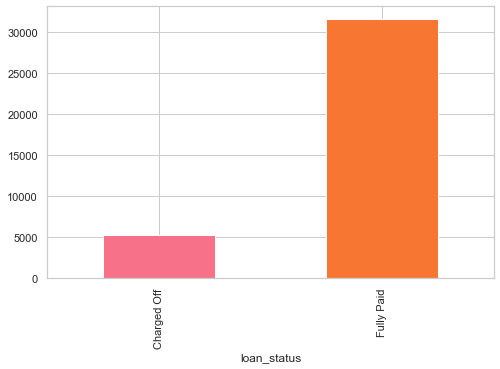

In [48]:
plt.figure(figsize=(8,5))
ax = clean_loan_data.groupby('loan_status').loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
plt.show()

In [49]:
print(round(clean_loan_data.loc[clean_loan_data['loan_status'] == 'Charged Off'].loan_status.count()*100/len(clean_loan_data),2),'%')

14.17 %


In [50]:
print(round(clean_loan_data.groupby('loan_status').total_pymnt.sum() * 100 / clean_loan_data.groupby('loan_status').loan_amnt.sum()))

loan_status
Charged Off     57.0
Fully Paid     117.0
dtype: float64


<b>Observation:</b><br>
- Around 14% loans are defaulted in our dataset.
- only 57% of loans are recovered in case of default.
- On fully paid loans, lending club makes 17% profit.

---
#### term

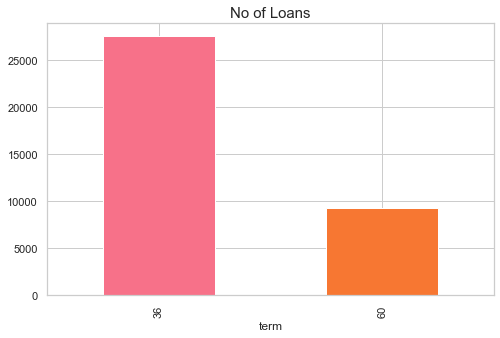

In [51]:
plt.figure(figsize=(8,5))
clean_loan_data.groupby('term').loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
plt.title("No of Loans",fontsize=15)
plt.show()

 Loan Status in Percentage 
term           36    60
loan_status            
Charged Off  11.0  25.0
Fully Paid   89.0  75.0
----------------------------------------------------------------------


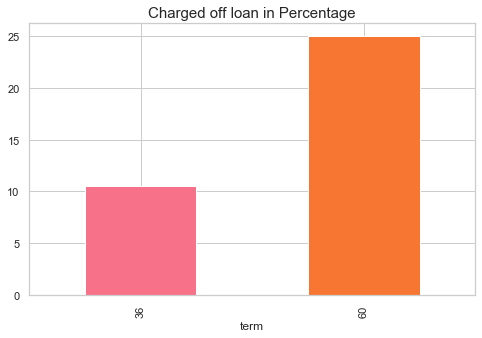

In [52]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'term')

<b>Observation:</b><br>
- Most loans are taken for 36 months.
- Loans with term of 60 months has higher chance of default (double than 36 months)
- Difference in default rate - 14%

---
#### loan_amnt

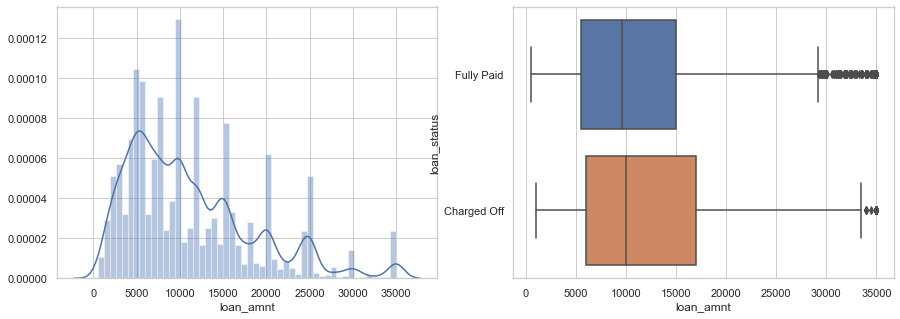

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(clean_loan_data['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=clean_loan_data['loan_amnt'],y=clean_loan_data['loan_status'],data=clean_loan_data)
plt.show()

In [54]:
clean_loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5204.0,12294.888547,8096.776239,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31534.0,10964.766601,7223.862728,500.0,5500.0,9600.0,15000.0,35000.0


In [55]:
# Binning the loan_status column for easier understanding

clean_loan_data['bin_loan_amnt'] = pd.cut(clean_loan_data['loan_amnt'],
                                          [x for x in range(0,40000,5000)],
                                          labels=('0-5','5-10','10-15','15-20','20-25','25-30','30-35'))

In [56]:
clean_loan_data.bin_loan_amnt.value_counts(sort=False)

0-5       8794
5-10     12174
10-15     7428
15-20     4191
20-25     2741
25-30      691
30-35      719
Name: bin_loan_amnt, dtype: int64

 Loan Status in Percentage 
bin_loan_amnt   0-5  5-10  10-15  15-20  20-25  25-30  30-35
loan_status                                                 
Charged Off    13.0  12.0   13.0   17.0   18.0   20.0   24.0
Fully Paid     87.0  88.0   87.0   83.0   82.0   80.0   76.0
----------------------------------------------------------------------


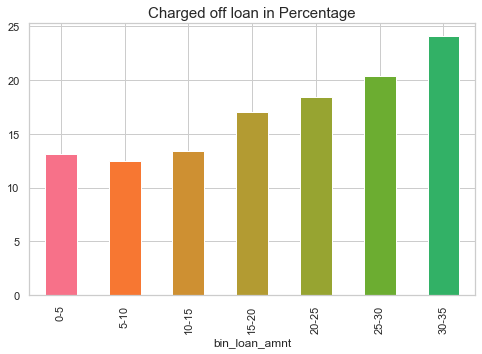

In [57]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'bin_loan_amnt')

<b>Observation:</b><br>
- Most of the loans granted are less than 15000
- Loan request for charged of loans is comparatively higher than fully paid loans
- Most loan given is 5000
- As loan amount increases, rate of default increases
- Difference in Default rate - 11%

---
#### home_ownership

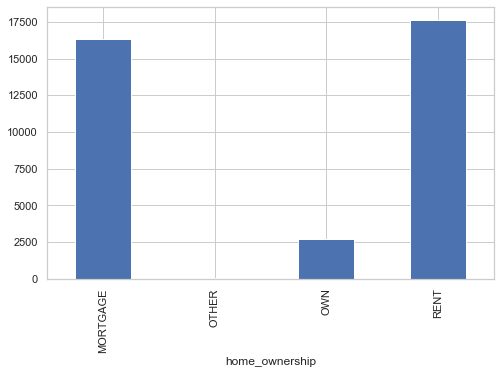

In [58]:
plt.figure(figsize=(8,5))
clean_loan_data.groupby('home_ownership').loan_amnt.count().plot.bar()
plt.show()

 Loan Status in Percentage 
home_ownership  MORTGAGE  OTHER   OWN  RENT
loan_status                                
Charged Off         13.0   19.0  14.0  15.0
Fully Paid          87.0   81.0  86.0  85.0
----------------------------------------------------------------------


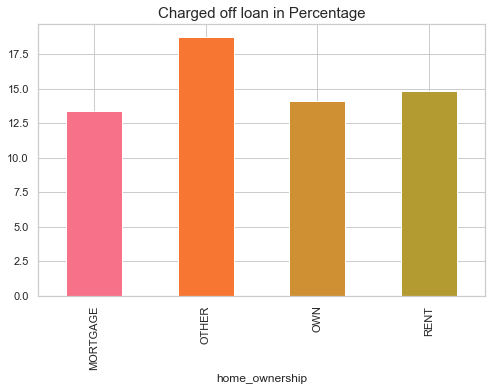

In [59]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'home_ownership')

---
#### verification_status

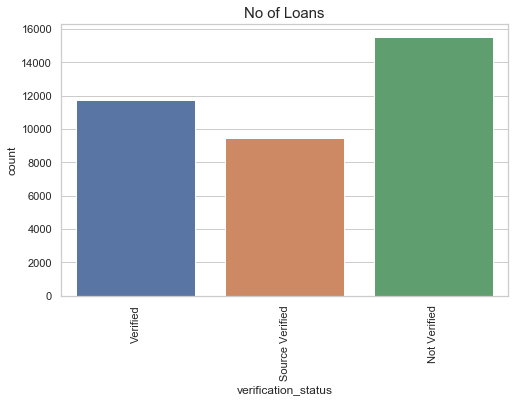

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x='verification_status', data=clean_loan_data)
plt.title('No of Loans', fontsize=15)
plt.xticks(rotation=90)
plt.show()

 Loan Status in Percentage 
verification_status  Not Verified  Source Verified  Verified
loan_status                                                 
Charged Off                  12.0             15.0      16.0
Fully Paid                   88.0             85.0      84.0
----------------------------------------------------------------------


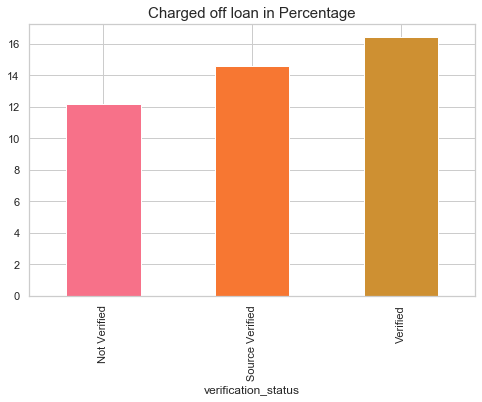

In [61]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'verification_status')

<b>Observation:</b><br>
- No of loans apprved without income source verification is higher than verified loans, this might be because of sales target.
- Also, Default in verified loans is higher than not verified loan. Lending club needs to recheck their verification process.
- Difference in default rate - 4%

---
#### grade

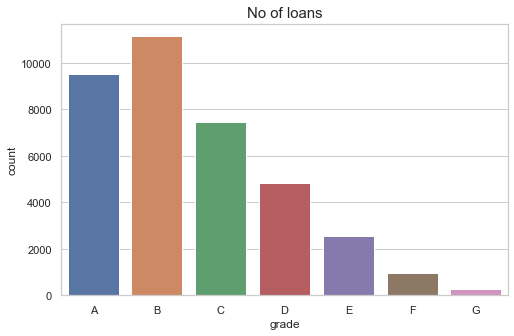

In [62]:
plt.figure(figsize=(8,5))
sns.countplot(x='grade', data=clean_loan_data.sort_values(by = 'grade'))
plt.title("No of loans", fontsize=15)
plt.show()

 Loan Status in Percentage 
grade           A     B     C     D     E     F     G
loan_status                                          
Charged Off   6.0  12.0  16.0  21.0  26.0  32.0  33.0
Fully Paid   94.0  88.0  84.0  79.0  74.0  68.0  67.0
----------------------------------------------------------------------


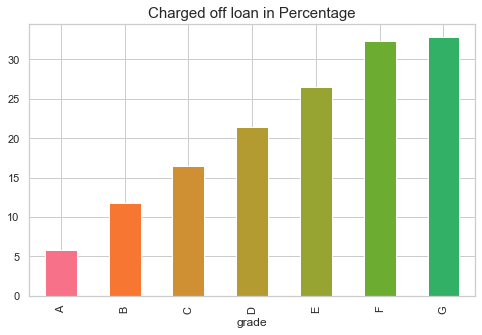

In [63]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data, 'grade')

<b>Observation:</b><br>
- Most loans are given in A and B grade
- As grade increases, no of approved loans decreases
- Higher grade loans have higher chance of defaulting, anything beyond C grade seems risky
- Difference in default rate - 27%

---
#### sub_grade

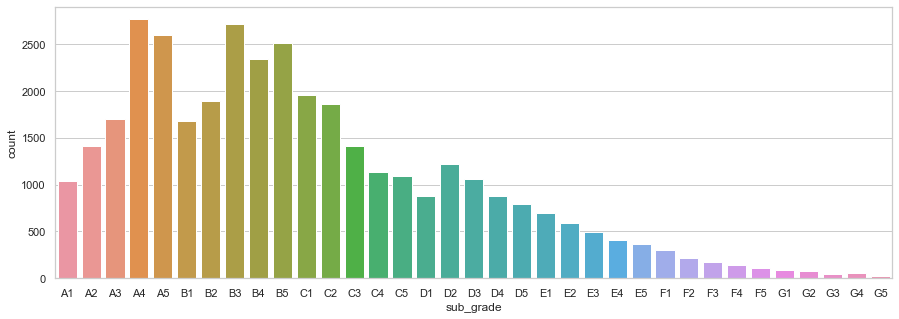

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=clean_loan_data.sort_values(by = 'sub_grade'))
plt.show()

 Loan Status in Percentage 
sub_grade      A1    A2    A3    A4    A5    B1    B2    B3    B4    B5    C1  \
loan_status                                                                     
Charged Off   2.0   5.0   5.0   6.0   8.0   9.0  11.0  12.0  13.0  13.0  16.0   
Fully Paid   98.0  95.0  95.0  94.0  92.0  91.0  89.0  88.0  87.0  87.0  84.0   

sub_grade      C2    C3    C4    C5    D1    D2    D3    D4    D5    E1    E2  \
loan_status                                                                     
Charged Off  16.0  18.0  17.0  17.0  17.0  20.0  23.0  22.0  25.0  27.0  26.0   
Fully Paid   84.0  82.0  83.0  83.0  83.0  80.0  77.0  78.0  75.0  73.0  74.0   

sub_grade      E3    E4    E5    F1    F2    F3    F4    F5    G1    G2    G3  \
loan_status                                                                     
Charged Off  23.0  30.0  28.0  29.0  29.0  28.0  36.0  48.0  30.0  36.0  42.0   
Fully Paid   77.0  70.0  72.0  71.0  71.0  72.0  64.0  52.0  70.0  64.0  58.0  

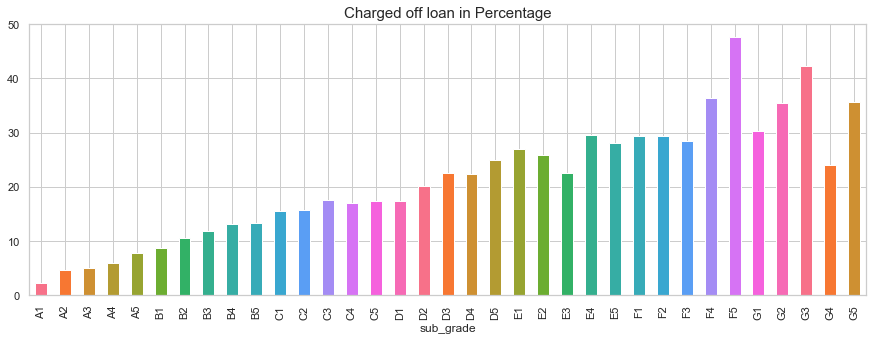

In [65]:
plt.figure(figsize=(15,5))
plot_percentage(clean_loan_data,'sub_grade')

<b>Observation:</b><br>
- Same trend can be seen in sub_grade as grade. No of loans decreases for icreasing grade.
- Difference in default rate - 46%

---
#### emp_length

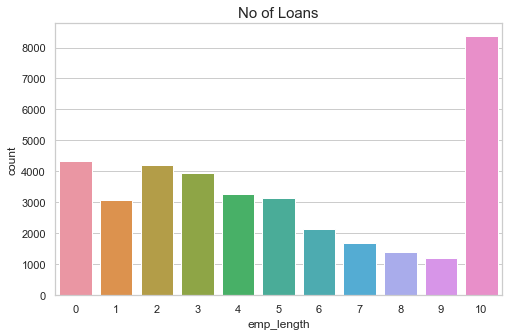

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='emp_length', data=clean_loan_data)
plt.title("No of Loans", fontsize=15)
plt.show()

 Loan Status in Percentage 
emp_length     0     1     2     3     4     5     6     7     8     9     10
loan_status                                                                  
Charged Off  14.0  14.0  13.0  14.0  13.0  14.0  14.0  15.0  14.0  13.0  15.0
Fully Paid   86.0  86.0  87.0  86.0  87.0  86.0  86.0  85.0  86.0  87.0  85.0
----------------------------------------------------------------------


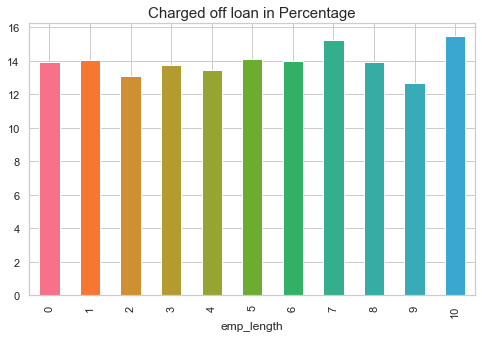

In [67]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data, 'emp_length')

<b>Observation:</b><br>
- Please with 10 or more years of employement usually apply for loans.
- Loan default in terms of employibility is same across all the emplyement lenght
- Difference in default rate - 2%

---
#### annual_inc

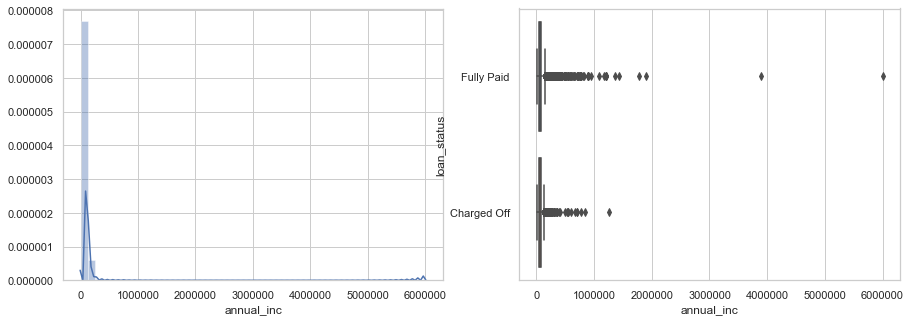

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(clean_loan_data['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=clean_loan_data['annual_inc'],y=clean_loan_data['loan_status'],data=clean_loan_data)
plt.show()

There are only 2 entries for more than 2000000, we shall eliminate them for our analysis

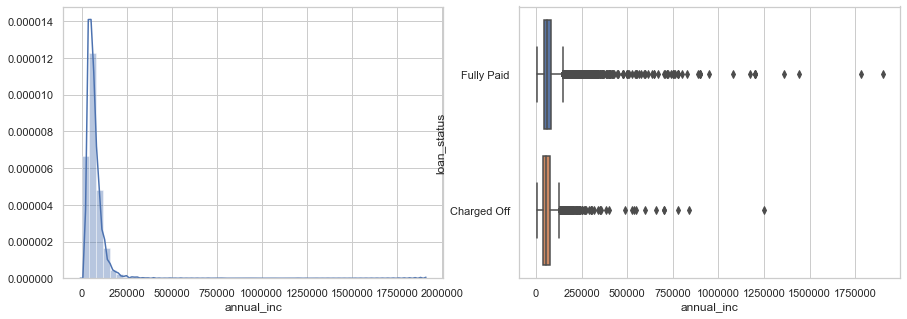

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(clean_loan_data[clean_loan_data['annual_inc'] < 2000000]['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=clean_loan_data[clean_loan_data['annual_inc'] < 2000000]['annual_inc'],y=clean_loan_data['loan_status'],data=clean_loan_data)
plt.show()

In [70]:
# Binning the annual_inc column for easier understanding

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

clean_loan_data['bin_annual_inc'] = clean_loan_data['annual_inc'].apply(lambda x: annual_income(x))

 Loan Status in Percentage 
bin_annual_inc  high   low  medium  very high
loan_status                                  
Charged Off     11.0  16.0    13.0       11.0
Fully Paid      89.0  84.0    87.0       89.0
----------------------------------------------------------------------


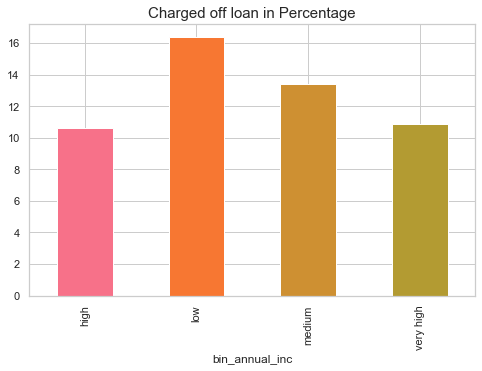

In [71]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data, 'bin_annual_inc')

<b>Observation:</b><br>
- Most people who apply for loans have annual income of less than 5 lac.
- People having less annual income have higher rate of default.
- Difference in default rate - 5%

---
#### int_rate

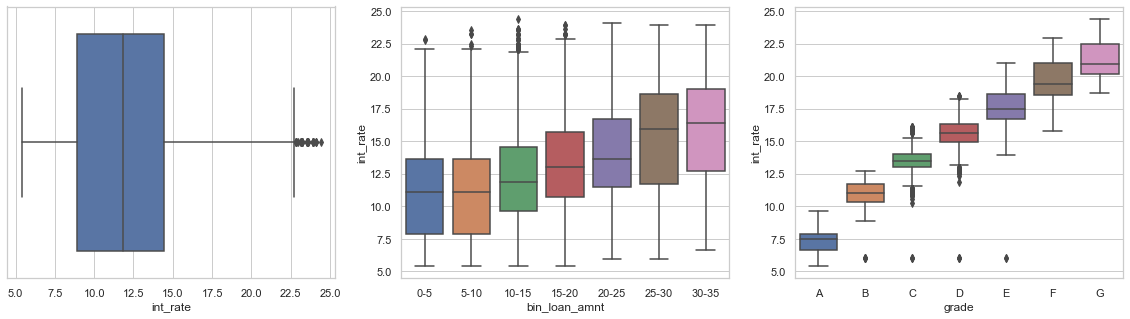

In [72]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='int_rate', data=clean_loan_data)
plt.subplot(1, 3, 2)
sns.boxplot(y='int_rate', x='bin_loan_amnt', data=clean_loan_data)
plt.subplot(1, 3, 3)
sns.boxplot(y='int_rate', x='grade', data=clean_loan_data.sort_values(by = 'grade'))
plt.show()

In [73]:
clean_loan_data.int_rate.describe()

count    36738.000000
mean        11.980481
std          3.701091
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

In [74]:
# Binning the int_rate column for easier understanding

clean_loan_data['bin_int_rate'] = round(clean_loan_data['int_rate'])

 Loan Status in Percentage 
bin_int_rate  5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0  13.0  14.0  \
loan_status                                                                
Charged Off    3.0   3.0   5.0   7.0   8.0  10.0  12.0  15.0  15.0  16.0   
Fully Paid    97.0  97.0  95.0  93.0  92.0  90.0  88.0  85.0  85.0  84.0   

bin_int_rate  15.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  24.0  
loan_status                                                               
Charged Off   19.0  21.0  26.0  27.0  30.0  35.0  35.0  45.0  50.0  39.0  
Fully Paid    81.0  79.0  74.0  73.0  70.0  65.0  65.0  55.0  50.0  61.0  
----------------------------------------------------------------------


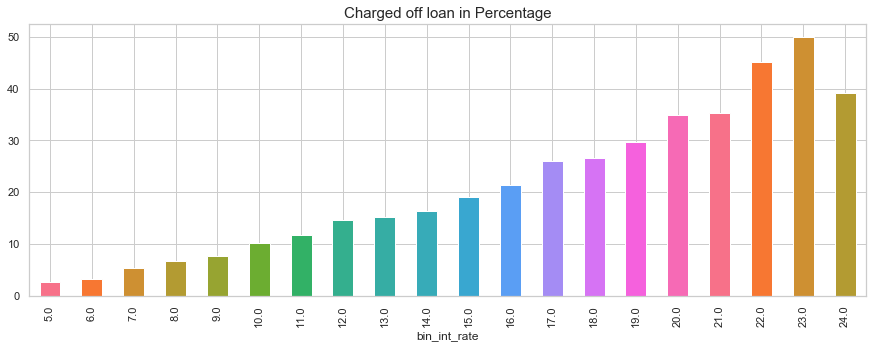

In [75]:
plt.figure(figsize=(15,5))
plot_percentage(clean_loan_data,'bin_int_rate')

<b>Observation:</b><br>
- Average inerest rate is around 12%
- Interst rate increases with loan amount
- Interest rate is higher for higher grades
- Default rate is around 50% after 22% interest rate
- Lending club should not consider loans with interest rates more than 15% as no of defaulters increase significantly
- Difference in default rate - 47%

---
#### purpose

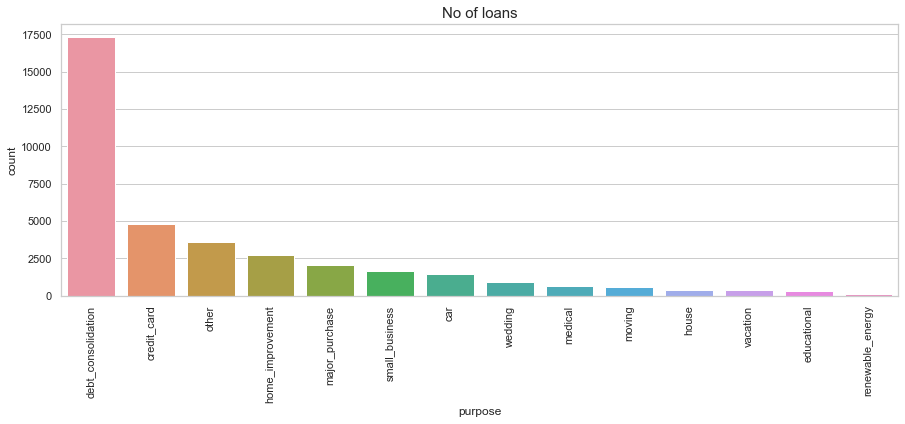

In [76]:
plt.figure(figsize=(15,5))
sns.countplot(x='purpose', data=clean_loan_data, order=clean_loan_data['purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.title("No of loans", fontsize=15)
plt.show()

 Loan Status in Percentage 
purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off  11.0         10.0                15.0         16.0   
Fully Paid   89.0         90.0                85.0         84.0   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off              12.0   16.0            10.0     15.0    15.0   16.0   
Fully Paid               88.0   84.0            90.0     85.0    85.0   84.0   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off              18.0            27.0      15.0      9.0  
Fully Paid               82.0            73.0      85.0     91.0  
----------------------------------------------------------------------


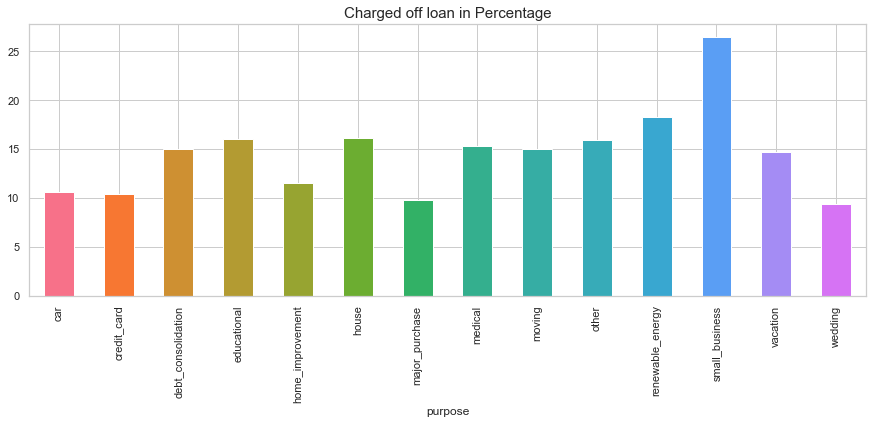

In [77]:
plt.figure(figsize=(15,5))
plot_percentage(clean_loan_data,'purpose')

<b>Observation:</b><br>
- Higher number of loans are taken for debt_consolidation
- Higher default rate is seen in loans taken for small business (27%)
- Lending club should stop giving loans for this purpose
- Difference in default rate - 17%

---
#### issue_d_month

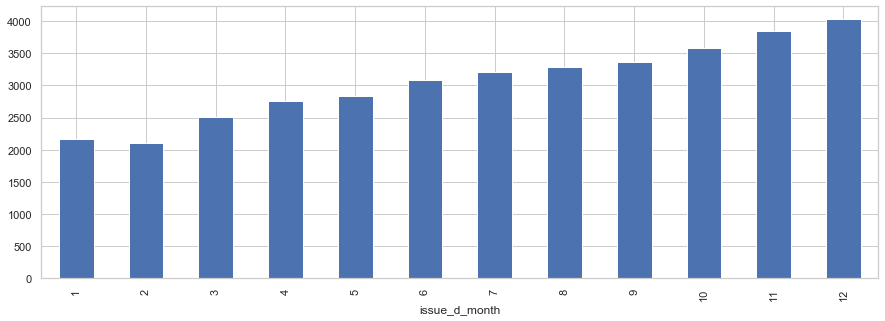

In [78]:
plt.figure(figsize=(15,5))
clean_loan_data.groupby(['issue_d_month']).loan_amnt.count().plot(kind='bar')
plt.show()

 Loan Status in Percentage 
issue_d_month    1     2     3     4     5     6     7     8     9     10  \
loan_status                                                                 
Charged Off    13.0  11.0  12.0  13.0  16.0  15.0  14.0  14.0  15.0  15.0   
Fully Paid     87.0  89.0  88.0  87.0  84.0  85.0  86.0  86.0  85.0  85.0   

issue_d_month    11    12  
loan_status                
Charged Off    14.0  16.0  
Fully Paid     86.0  84.0  
----------------------------------------------------------------------


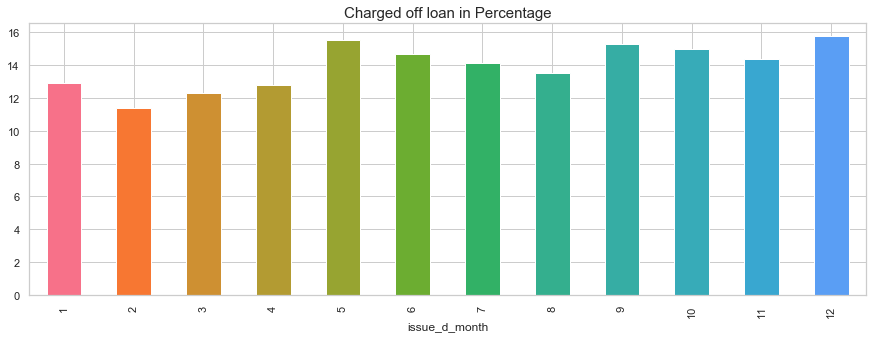

In [79]:
plt.figure(figsize=(15,5))
plot_percentage(clean_loan_data,'issue_d_month')

<b>Observation:</b><br>
- No of loan approvals increase in final months, it must be because of sales target
- Theres no significant trend in default rate for month. Average default rate for all months is ~14%
- Difference in default rate - 5%

---
#### issue_d_year

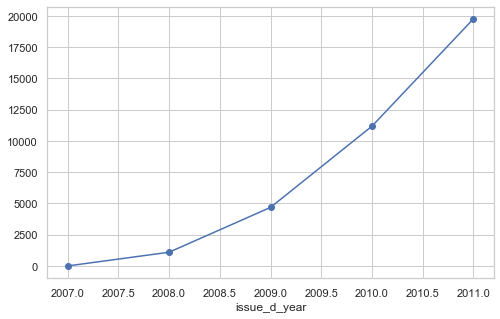

In [80]:
plt.figure(figsize=(8,5))
clean_loan_data.groupby(['issue_d_year']).loan_amnt.count().sort_values(ascending=False).plot(kind='line', marker='o', color='b')
plt.show()

 Loan Status in Percentage 
issue_d_year  2007  2008  2009  2010  2011
loan_status                               
Charged Off   29.0  15.0  12.0  12.0  16.0
Fully Paid    71.0  85.0  88.0  88.0  84.0
----------------------------------------------------------------------


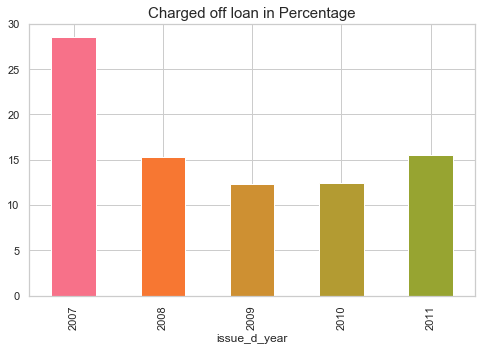

In [81]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'issue_d_year')

<b>Observation:</b><br>
- No of loan applications grow significantly every year
- Default rate in 2007 was much higher than other years, this may be because of the market crash in 2008

---
#### pub_rec_bankruptcies

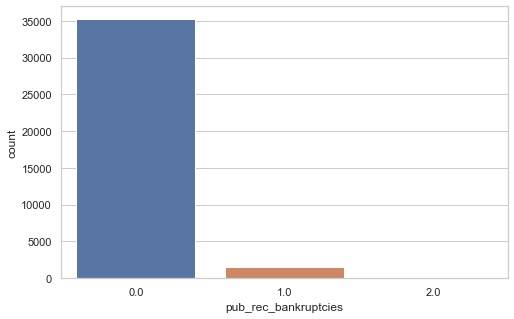

In [82]:
plt.figure(figsize=(8,5))
sns.countplot(x='pub_rec_bankruptcies', data=clean_loan_data)
plt.show()

 Loan Status in Percentage 
pub_rec_bankruptcies   0.0   1.0   2.0
loan_status                           
Charged Off           14.0  22.0  40.0
Fully Paid            86.0  78.0  60.0
----------------------------------------------------------------------


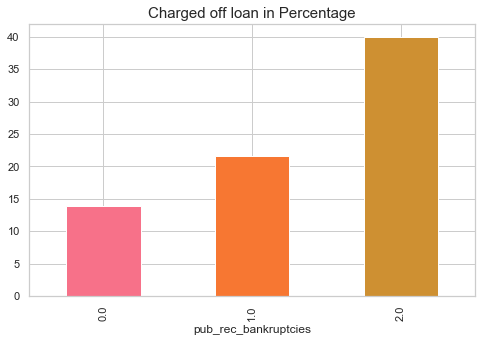

In [83]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'pub_rec_bankruptcies')

<b>Observation:</b><br>
- Very few loans are given to people having previous bankruptcy record
- Lending club should not approve loans for customers having even 1 bankruptcy record
- Difference in default rate - 26%

---
#### dti

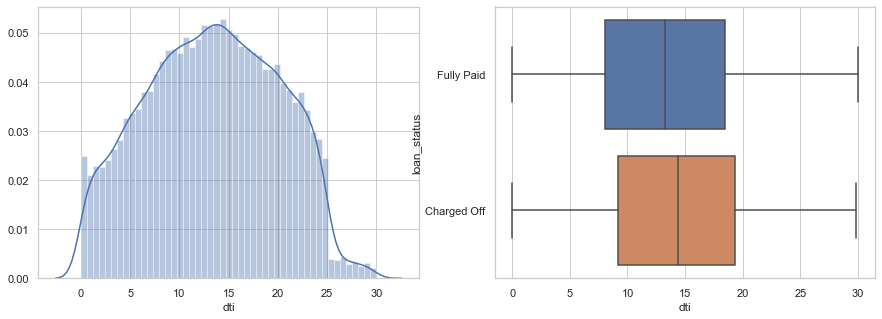

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(clean_loan_data['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(x=clean_loan_data['dti'],y=clean_loan_data['loan_status'],data=clean_loan_data)
plt.show()

In [85]:
# Binning the dti column for easier understanding

clean_loan_data['bin_dti'] = pd.cut(clean_loan_data['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

 Loan Status in Percentage 
bin_dti       0-5  5-10  10-15  15-20  20-25  25-30
loan_status                                        
Charged Off  12.0  12.0   14.0   15.0   16.0   13.0
Fully Paid   88.0  88.0   86.0   85.0   84.0   87.0
----------------------------------------------------------------------


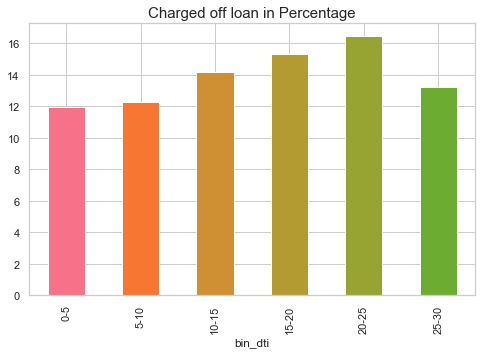

In [86]:
plt.figure(figsize=(8,5))
plot_percentage(clean_loan_data,'bin_dti')

<b>Observation:</b><br>
- Average dti for charged off loans is comparatively higher
- Higher the dti, higher the default rate
- Different in default rate - 4%

---
#### addr_state

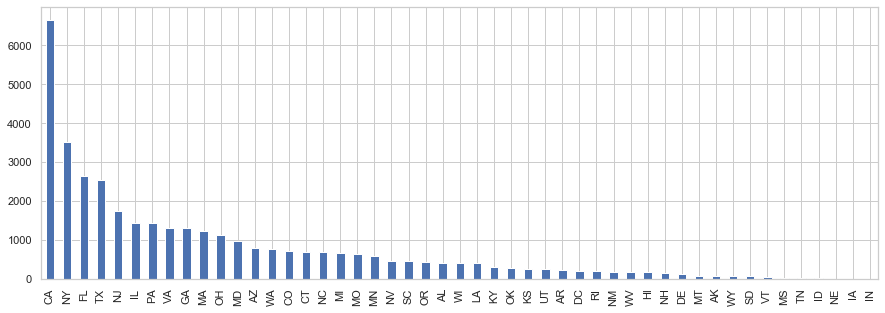

In [87]:
plt.figure(figsize=(15,5))
clean_loan_data.addr_state.value_counts().plot.bar()
plt.show()

 Loan Status in Percentage 
addr_state     AK    AL    AR    AZ    CA    CO    CT    DC    DE    FL    GA  \
loan_status                                                                     
Charged Off  20.0  12.0  12.0  14.0  16.0  12.0  12.0   7.0  10.0  17.0  15.0   
Fully Paid   80.0  88.0  88.0  86.0  84.0  88.0  88.0  93.0  90.0  83.0  85.0   

addr_state     HI     IA     ID    IL     IN    KS    KY    LA    MA    MD  \
loan_status                                                                  
Charged Off  18.0    NaN    NaN  13.0    NaN  11.0  14.0  13.0  12.0  15.0   
Fully Paid   82.0  100.0  100.0  87.0  100.0  89.0  86.0  87.0  88.0  85.0   

addr_state     MI    MN    MO    MS    MT    NC     NE    NH    NJ    NM  \
loan_status                                                                
Charged Off  14.0  13.0  16.0  11.0  13.0  15.0    NaN  15.0  15.0  17.0   
Fully Paid   86.0  87.0  84.0  89.0  87.0  85.0  100.0  85.0  85.0  83.0   

addr_state     NV    NY    OH

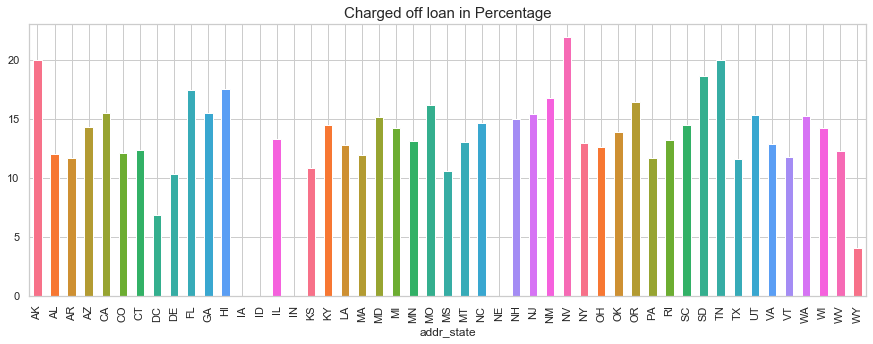

In [88]:
plt.figure(figsize=(15,5))
plot_percentage(clean_loan_data, 'addr_state')

<b>Observation:</b><br>
- California, New York and Florida have high number of loan approvals
- People in Nevada have high rate of default than any other state (22%)
- Difference in default rate - 18%

## Bivariate Analysis

---
##### Loan amount vs year

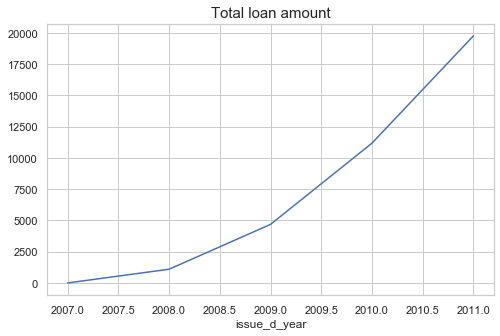

In [89]:
plt.figure(figsize=(8,5))
clean_loan_data.groupby('issue_d_year').loan_amnt.count().plot(kind='line')
plt.title("Total loan amount", fontsize=15)
plt.show()

---
##### Average loan amount vs year

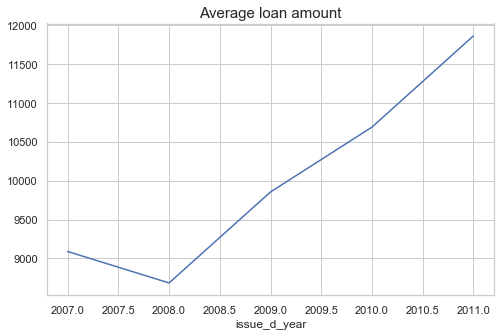

In [90]:
plt.figure(figsize=(8,5))
clean_loan_data.groupby('issue_d_year').loan_amnt.mean().plot(kind='line')
plt.title("Average loan amount", fontsize=15)
plt.show()

<b>Observation:</b><br>
-  Average loan amount dropped sharply when subprime mortgage crisis hit

---
##### loan amount vs annual income

<Figure size 720x720 with 0 Axes>

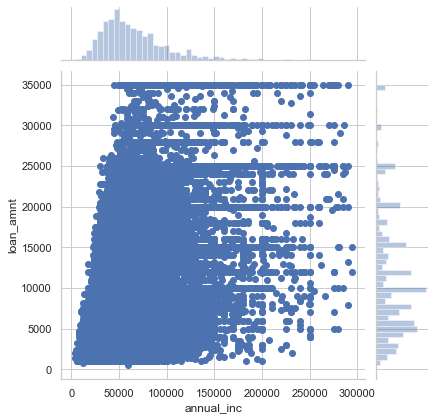

In [91]:
plt.figure(figsize=(10,10))
sns.jointplot('annual_inc','loan_amnt',data=clean_loan_data.loc[clean_loan_data['annual_inc']<300000])
plt.show()

<b>Observation:</b><br>
-  People with less income are also getting higher amount of loans, this loans will have higher chance of default as dti is around than 50%

---
##### loan amount vs grade

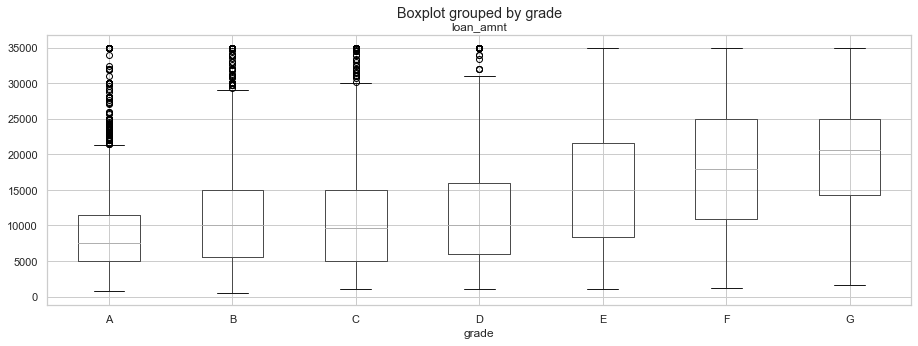

In [92]:
clean_loan_data.boxplot(column='loan_amnt',by='grade',figsize=(15,5))
plt.show()

<b>Observation:</b><br>
-  People with lower grades are getting loan approved for higher amount

---
##### int rate vs term

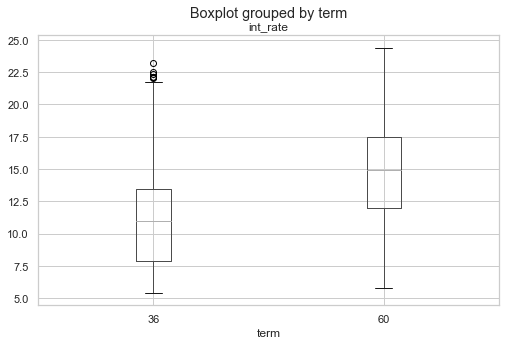

In [93]:
clean_loan_data.boxplot(column='int_rate',by='term',figsize=(8,5))
plt.show()

<b>Observation:</b><br>
- Higher term have high interst rate

---
##### int rate vs grade

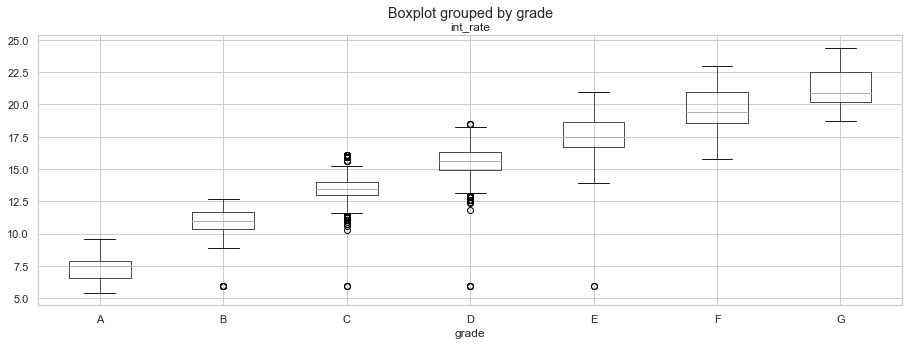

In [94]:
clean_loan_data.boxplot(column='int_rate',by='grade',figsize=(15,5))
plt.show()

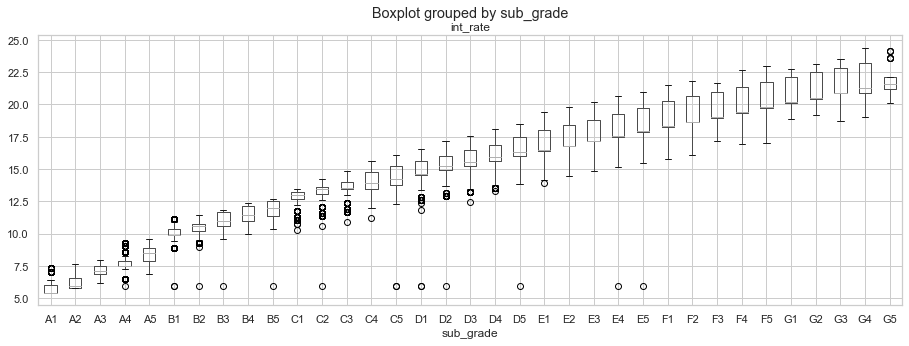

In [95]:
clean_loan_data.boxplot(column='int_rate',by='sub_grade',figsize=(15,5))
plt.show()

<b>Observation:</b><br>
- Interst rate is directly proportional to Grade/subgrade, poorer the grade, higher the interst rate

---
##### loan amount vs term

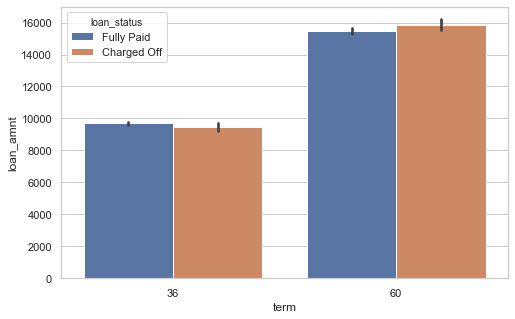

In [96]:
plt.figure(figsize=(8,5))
sns.barplot('term','loan_amnt',hue='loan_status', data=clean_loan_data)
plt.show()

<b>Observation:</b><br>
- Higher loans are given for longer terms.

---
##### emp_length vs loan amount

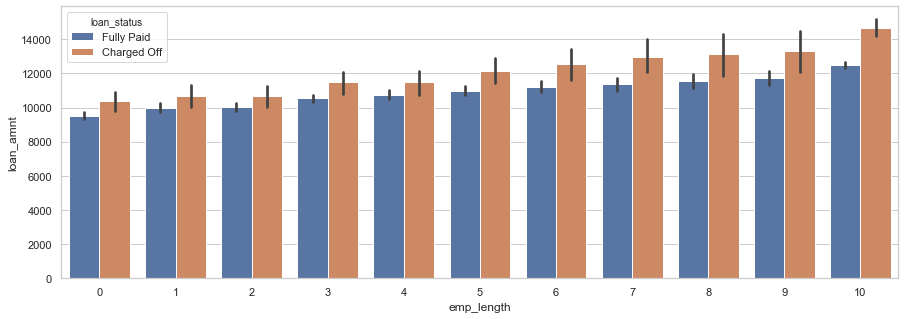

In [97]:
plt.figure(figsize=(15,5))
sns.barplot('emp_length','loan_amnt',hue='loan_status',data=clean_loan_data)

<b>Observation:</b><br>
- Loan amount increases with no of years in employement

---
##### purpose vs term

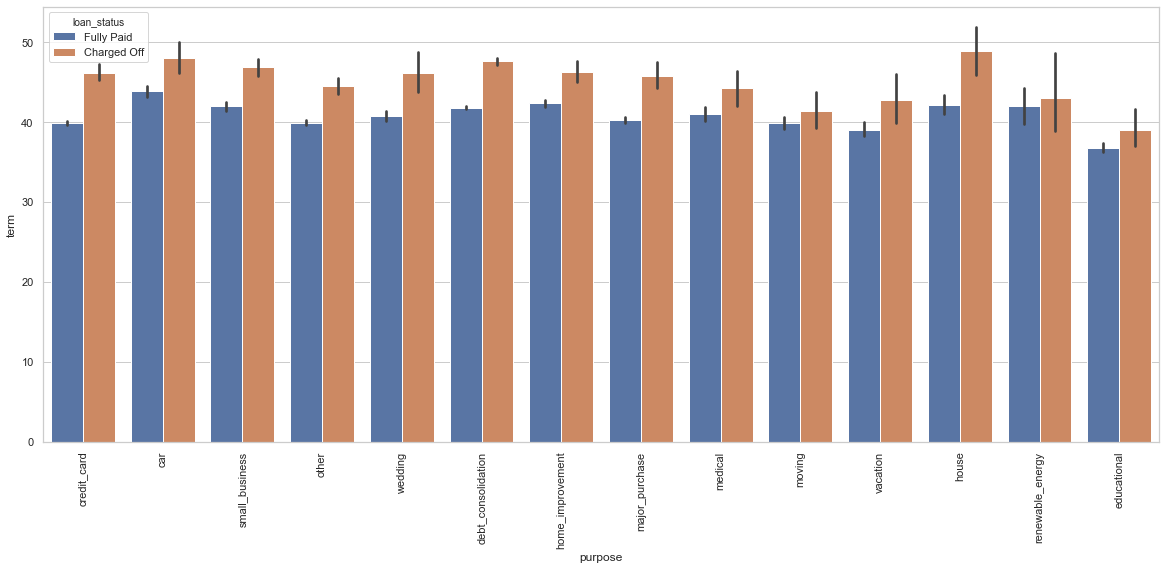

In [98]:
plt.figure(figsize=(20,8))
sns.barplot('purpose','term',hue='loan_status',data=clean_loan_data)
plt.xticks(rotation=90)
plt.show()

---

---
## Overall Observations


1. People having less annual income have higher rate of default.

2. Lending club should not consider loans with interest rates more than 15% as no of defaulters increase significantly

3. Lending club should not consider approving loans for applicant having DTI more than 20

4. Loans with term of 60 months has higher chance of default (double than 36 months)

5. Lending club should stop giving loans/do thorough verification before approving loans for small business  because higher default rate is seen in loans taken for small business (27%)

6. Lending club should not approve loans for applicant having even single record of bankruptcy